## Keypoint Detection
---
There are 10 images given in the ***img*** folder. Your task is to detect ***200*** keypoints for each of them using detectors.

Below are the tutorials about SIFT and Harris corners:

SIFT: https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

Harris corners: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html#harris-corners

Let's take a look at these images first!

---

In [1]:
# load packages
import cv2
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

/scratch/kaowe/miniconda3/envs/hw1/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


images/9.jpg


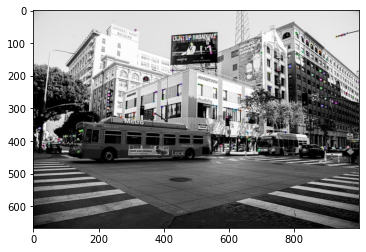

images/10.jpg


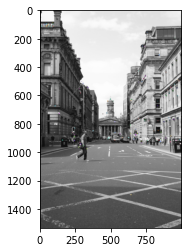

images/3.jpg


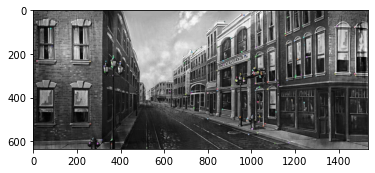

images/4.jpg


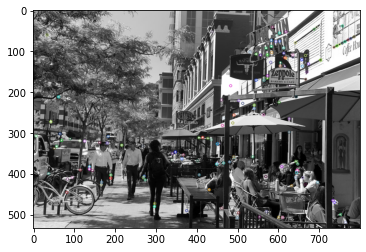

images/1.jpg


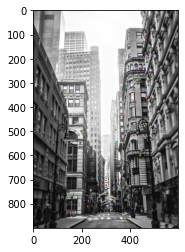

images/6.jpg


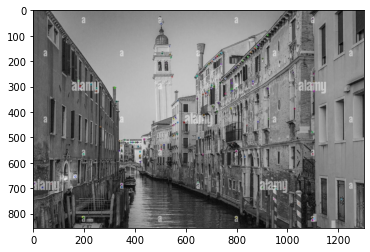

images/5.jpg


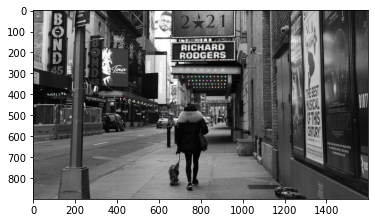

images/8.jpg


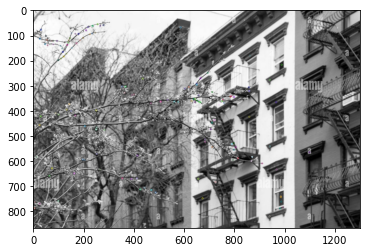

images/2.jpg


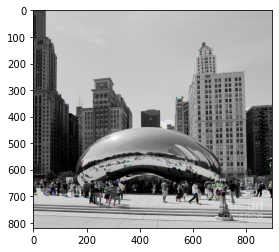

images/7.jpg


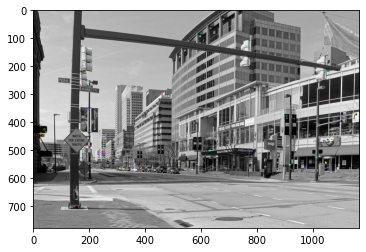

In [2]:
img_dir = "images"
total_images = 0
all_kp_s = []
all_kp_h = []
if os.path.exists(img_dir):
    if os.listdir(img_dir) is []:
        print("No images!")
        exit(0)
    num_img = len(os.listdir(img_dir))
    
    for img in os.listdir(img_dir):
        if not img.endswith("jpg"):
            continue
        total_images = total_images + 1
        images_dir = os.path.join(img_dir, img)
        print(images_dir)
        images = cv2.imread(images_dir)
        gray= cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)
        
        # SIFT Detection
        sift = cv2.SIFT_create(nfeatures = 200)
        kp = []
        kp = sift.detect(gray,None)      #kp[0] = x coordinate, kp[1] = y coordinate
        #print(kp)
        all_kp_s.append(kp)
        
        img1 = cv2.drawKeypoints(gray,kp,images )
        cv2.imwrite('SIFT_keypoints' + str(img),images)
        
        
        # Harris Detection
        #gray = np.float32(gray)
        #dst = cv2.cornerHarris(gray,2,3,0.04)
        #dst = cv2.dilate(dst,None)
            
        #kp_h=[]
        #dst_max = []
        #while len(kp_h) < 200:
        #    images[dst == dst.max()]=[0,255,255]
        #    dst_max.append(dst.max())
        #    position = np.where(dst == dst.max())
            
        #    for i in range(len(position[0])):
                #print(position)
        #        kp_h.append([position[1][i], position[0][i]])
            
            
        #    dst = np.where(dst == dst.max(), 0, dst)

        #all_kp_h.append(kp_h)

        #cv2.imwrite('harris_keypoints' + str(img),images)
        plt.imshow(images)
        plt.show()

else:
    print("image folder not exists!")
    exit(0)

### The Keypoints:
The output of this part is a list of keypoints that represented by the x and y cooridnates.

For example, the 10 points of image ***3.jpg*** are:

In [3]:

#keypoints = list([(10.0, 10),  (16.0, 15.5), (15, 16), (1585, 16), (15, 1024), (100, 106), (150, 160), (715, 716), (315, 916), (815, 640)])

Then we can obtain the patches with these keypoints:


In [3]:
def getPatches(kps, img, size=32, num=500):
    res = torch.zeros(num, 1, size, size)
    if type(img) is np.ndarray:
        img = torch.from_numpy(img)
    h, w = img.shape      # note: for image, the x direction is the verticle, y-direction is the horizontal...
    for i in range(num):
        cx, cy = kps[i]
        cx, cy = int(cx), int(cy)
        dd = int(size/2)
        xmin, xmax = max(0, cx - dd), min(w, cx + dd ) 
        ymin, ymax = max(0, cy - dd), min(h, cy + dd ) 
        
        xmin_res, xmax_res = dd - min(dd,cx), dd + min(dd, w - cx)
        ymin_res, ymax_res = dd - min(dd,cy), dd + min(dd, h - cy)

        cropped_img = img[ymin: ymax, xmin: xmax]
        ch, cw = cropped_img.shape
        res[i, 0, ymin_res: ymin_res+ch, xmin_res: xmin_res+cw] =  cropped_img
        
    return res

### Let's plot these patches

In [4]:
#img = cv2.imread('images/5.jpg')
#gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray = img[:, :, 0]

all_patches = []
all_coordinates = []
order = 0 # go through keypoints in order
#for img in range(total_images):
#    Mykeypoints = []
#    images = cv2.imread(images_dir)
#    gray= cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)
  
for img in os.listdir(img_dir):
    Mykeypoints = []
    if not img.endswith("jpg"):
        continue
    images_dir = os.path.join(img_dir, img)
    
    print(images_dir)
    images = cv2.imread(images_dir)
    gray= cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)    
    
    
    #SIFT
    for numkp in range(200):        
        Mykeypoints = Mykeypoints + [ (all_kp_s[order][numkp].pt[0], all_kp_s[order][numkp].pt[1]) ]
    order = order + 1
    all_coordinates.append(Mykeypoints)    
    patches = getPatches(Mykeypoints, gray,size=32, num=200)    
    all_patches.append(patches)
#print(all_coordinates)

    #Harris
    #force the range be 200 instead of len(kp_h)
    
    #for numkp_h in range(200):    
    #    Mykeypoints = Mykeypoints + [ (all_kp_h[order][numkp_h][0], all_kp_h[order][numkp_h][1]) ]
    #order = order + 1
    #all_coordinates.append(Mykeypoints)
    #print(len(Mykeypoints))
    #patches = getPatches(Mykeypoints, gray,size=32, num=200)
    
    #all_patches.append(patches)
      
        
#for patch in patches:
#    im = patch[0].numpy()
#    plt.imshow(im)
#    plt.show()


images/9.jpg
images/10.jpg
images/3.jpg
images/4.jpg
images/1.jpg
images/6.jpg
images/5.jpg
images/8.jpg
images/2.jpg
images/7.jpg


### Save the patches with PyTorch
For each image, you can output the patches within one tensor. In above examples, tensor ***patches*** is the one that you should store in a list. And then save the list as a "SIFT.pth" file:

In [5]:
#all_patches = []
#all_patches.append(patches)


all_coordinates = torch.FloatTensor(all_coordinates)
print(len(all_coordinates))
output_dir1 = "SIFT.pth"         # modify it to SIFT.pth or Harris.pth
torch.save(all_coordinates, output_dir1)


all_patches = torch.stack(all_patches, dim=0)
output_dir2 = "SIFT_patches.pth"         # modify it to SIFT.pth or Harris.pth
torch.save(all_patches, output_dir2)

10


### Test with your saved patches

In [6]:
test_coordinates = torch.load(output_dir1)
print(type(test_coordinates))
print(test_coordinates.shape)


test_patches = torch.load(output_dir2)
print(type(test_patches))
print(test_patches.shape)
print(test_patches)
# your tensor for each should have size of [10, 200, 1, 32, 32];where 10 means 10 images (in the order 1-10), 200 means 200 points.

<class 'torch.Tensor'>
torch.Size([10, 200, 2])
<class 'torch.Tensor'>
torch.Size([10, 200, 1, 32, 32])
tensor([[[[[150., 183., 210.,  ...,   0.,   0.,   0.],
           [193., 197., 218.,  ...,   0.,   0.,   0.],
           [234., 219., 225.,  ...,   0.,   0.,   0.],
           ...,
           [165., 202., 235.,  ...,   0.,   0.,   0.],
           [146., 182., 233.,  ...,   0.,   0.,   0.],
           [172., 176., 227.,  ...,   0.,   0.,   0.]]],


         [[[230., 219., 226.,  ...,   3.,   8.,   2.],
           [221., 221., 216.,  ...,   0.,   0.,   0.],
           [171., 187., 213.,  ...,   0.,  30.,  16.],
           ...,
           [173., 191., 190.,  ..., 119., 136., 100.],
           [106.,  88., 106.,  ...,  70.,  67.,  44.],
           [ 14.,   8.,  11.,  ...,  40.,  12.,   0.]]],


         [[[230., 219., 226.,  ...,   3.,   8.,   2.],
           [221., 221., 216.,  ...,   0.,   0.,   0.],
           [171., 187., 213.,  ...,   0.,  30.,  16.],
           ...,
           [173